In [77]:
import numpy as np
import matplotlib.pyplot as plt
import time 
from scipy.integrate import odeint

In [211]:
class agent():
    def __init__(self,idd,linkedId,omega=1,ndim=1):
        # self.x = np.random.uniform(low=0, high=2*np.pi,size=(ndim,))
        self.x = np.ones((ndim,))*idd%3*2*np.pi/3
        self.omega = omega
        self.id = idd
        self.linkedId = linkedId
        
    def ddtX(self,x,t,othersX):
        return self.omega - np.sum(np.sin((othersX-x)))
    
    def nextX(self,dt,othersX):
        self.x = odeint(self.ddtX,self.x,[0,dt],args=(othersX,))[-1]
        return self.x
    
class drawAgents():
    def __init__(self):
        plt.figure()
        theta = np.linspace(0,2*np.pi,200)
        self.track = plt.plot(np.cos(theta),np.sin(theta))
        plt.axis('equal')
        
        self.canvas = plt
        
    def addAgents(self,agents):
        self.agentsPlt = self.canvas.scatter(np.cos(agents),np.sin(agents),50,'r')
        
    def show(self):
        self.canvas.show()
        
    def removeAgents(self):
        self.agentsPlt.remove()
        


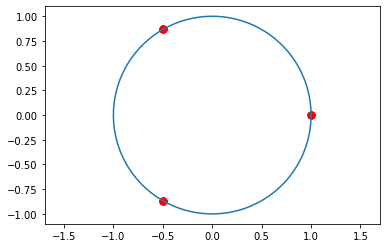

In [212]:
dt = .1
T = 100
totalNum = int(T/dt)


# initialize agents
numAgents = 15
agents = [agent(i,[(i-1)%numAgents, (i+1)%numAgents],omega=omega) for i in range(numAgents) ]
agentsVal = [agents[i].x for i in range(numAgents) ]
coordTrans = 1

# for control
numCluster = 3
alpha = int(numAgents/numCluster)
omega = 1
pertTimes = 5

# initialize canvas
canvas = drawAgents()
canvas.addAgents(agentsVal)
canvas.show()
canvas.removeAgents()

recordX = np.zeros((totalNum,numAgents))
recordV = np.zeros((totalNum-1,))
recordX[0,:] = np.array(agentsVal).squeeze()

    
for i in range(totalNum-1):
    
    temp = np.zeros((numAgents,))
    for j in range(numAgents):
        
        otherAgentsVal = [agents[i].x for i in agents[j].linkedId]
        agentsVal[j] = agents[j].nextX(dt,otherAgentsVal)
        temp[j] = np.cos(otherAgentsVal-agentsVal[j]).sum()
        # agents[j].x = agentsVal[j]
    
    
        
    if not i%int(totalNum/pertTimes) and i != 0:
        # for j in range(numAgents):
        #     agents[j].x *= alpha
        #     agentsVal[j] = agents[j].x
        agents[0].x += np.pi/2
        
        
    if coordTrans :
        recordX[i+1,:] = np.array(agentsVal).squeeze() - omega*i*dt
        # recordX[i+1,:] = np.array(agentsVal).squeeze() - agentsVal[0]
    else:
        recordX[i+1,:] = np.array(agentsVal).squeeze()
        
    recordV[i] = (pow(numAgents,2)-2*numAgents+2*temp.sum())/pow(numAgents,2)
    

   

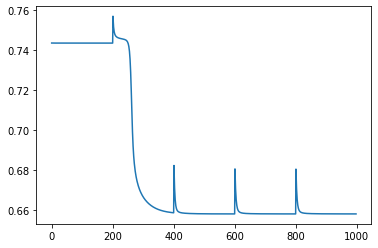

In [213]:
plt.plot(recordV)
plt.show()

In [204]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def series(idx):
    plt.figure(figsize=(8,6))
    theta = np.linspace(0,2*np.pi,200)
    plt.plot(np.cos(theta),np.sin(theta))
    
    plt.scatter(np.cos(recordX[idx,:]),np.sin(recordX[idx,:]),50,'r')
    
    [plt.plot([np.cos(recordX[idx,agents[i].linkedId[0 ]]),np.cos(recordX[idx,i]),np.cos(recordX[idx,agents[i].linkedId[1]])],\
              [np.sin(recordX[idx,agents[i].linkedId[0]]),np.sin(recordX[idx,i]),np.sin(recordX[idx,agents[i].linkedId[1]])],\
              'r') for i in range(numAgents)]
    # [plt.plot([np.cos(recordX[idx,(i-1)%numAgents]),np.cos(recordX[idx,i]),np.cos(recordX[idx,(i+1)%numAgents])],\
    #           [np.sin(recordX[idx,(i-1)%numAgents]),np.sin(recordX[idx,i]),np.sin(recordX[idx,(i+1)%numAgents])],\
    #           'r') for i in range(numAgents)] 
    
    plt.axis('equal')
    plt.show()
    return

interact(series, idx=(0,len(recordX)-1,1))

interactive(children=(IntSlider(value=499, description='idx', max=999), Output()), _dom_classes=('widget-inter…

<function __main__.series(idx)>

In [84]:
recordX = np.zeros((totalNum,numAgents))
recordX[0,:] = np.random.uniform(0,2*np.pi,size=(numAgents,))

def ddtX(x,t,othersX,omega):
    return omega - np.sum(np.sin((othersX-x)))

def nextX(dt,x,othersX,omega):
    return odeint(ddtX,x,(0,dt),args=(othersX,omega))

for idxT in range(1,totalNum):
    for idxA in range(numAgents):
        othersX = [recordX[idxT-1,(idxA-1)%numAgents], recordX[idxT-1,(idxA+1)%numAgents]]  
        recordX[idxT,idxA] = nextX(dt,recordX[idxT-1,idxA],othersX,omega)[-1]
    recordX[idxT,:] -= recordX[idxT,0]


In [65]:
-1%10

9